# Arabic Handwritten Digits Classification

In [131]:
import cv2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from keras.preprocessing.image import ImageDataGenerator
from keras import Model, layers
# Load the TensorBoard notebook extension
#% load_ext tensorboard


In [63]:
characters = ["ا", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", "ض", "ط", "ظ", "ع", "غ", "ف", "ق",
              "ك", "ل", "م", "ن", "ه", "و", "ي"]
characters_dict = dict(zip(np.arange(1, len(characters) + 1), characters))
characters_dict

{1: 'ا',
 2: 'ب',
 3: 'ت',
 4: 'ث',
 5: 'ج',
 6: 'ح',
 7: 'خ',
 8: 'د',
 9: 'ذ',
 10: 'ر',
 11: 'ز',
 12: 'س',
 13: 'ش',
 14: 'ص',
 15: 'ض',
 16: 'ط',
 17: 'ظ',
 18: 'ع',
 19: 'غ',
 20: 'ف',
 21: 'ق',
 22: 'ك',
 23: 'ل',
 24: 'م',
 25: 'ن',
 26: 'ه',
 27: 'و',
 28: 'ي'}

In [64]:
y_train = pd.read_csv(
    "/home/muzammil/Python_programs/Arabic Handwritten digits/archive/Arabic Handwritten Characters Dataset CSV/csvTrainLabel 13440x1.csv")
Y_train = y_train
Y_train.head()

,1
0,1
1,1
2,1
3,1
4,1


In [65]:
X_train = pd.read_csv(
    "/home/muzammil/Python_programs/Arabic Handwritten digits/archive/Arabic Handwritten Characters Dataset CSV/csvTrainImages 13440x1024.csv")
X_train.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
X_test = pd.read_csv(
    "/home/muzammil/Python_programs/Arabic Handwritten digits/archive/Arabic Handwritten Characters Dataset CSV/csvTestImages 3360x1024.csv")
X_test.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.919,0.920,0.921,0.922,0.923,0.924,0.925,0.926,0.927,0.928
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
y_test = pd.read_csv(
    "/home/muzammil/Python_programs/Arabic Handwritten digits/archive/Arabic Handwritten Characters Dataset CSV/csvTestLabel 3360x1.csv")
Y_test = y_test
Y_test.head()

,1
0,1
1,2
2,2
3,3
4,3


In [68]:
X_train = X_train.iloc[:, :].values.astype('float32')
Y_train = Y_train.iloc[:, :].values.astype('int32') - 1  # fix the index in dataset

X_test = X_test.iloc[:, :].values.astype('float32')
Y_test = Y_test.iloc[:, :].values.astype('int32') - 1


In [69]:

X_train = X_train.reshape(X_train.shape[0], 32, 32)
X_test = X_test.reshape(X_test.shape[0], 32, 32)
print("Train images shape: ", X_train.shape)
print("Train labels shape: ", Y_train.shape)

print("Test images shape: ", X_test.shape)
print("Test labels shape: ", Y_test.shape)

Train images shape:  (13439, 32, 32)
Train labels shape:  (13439, 1)
Test images shape:  (3359, 32, 32)
Test labels shape:  (3359, 1)


<h1>VISUALIZATION</h1>

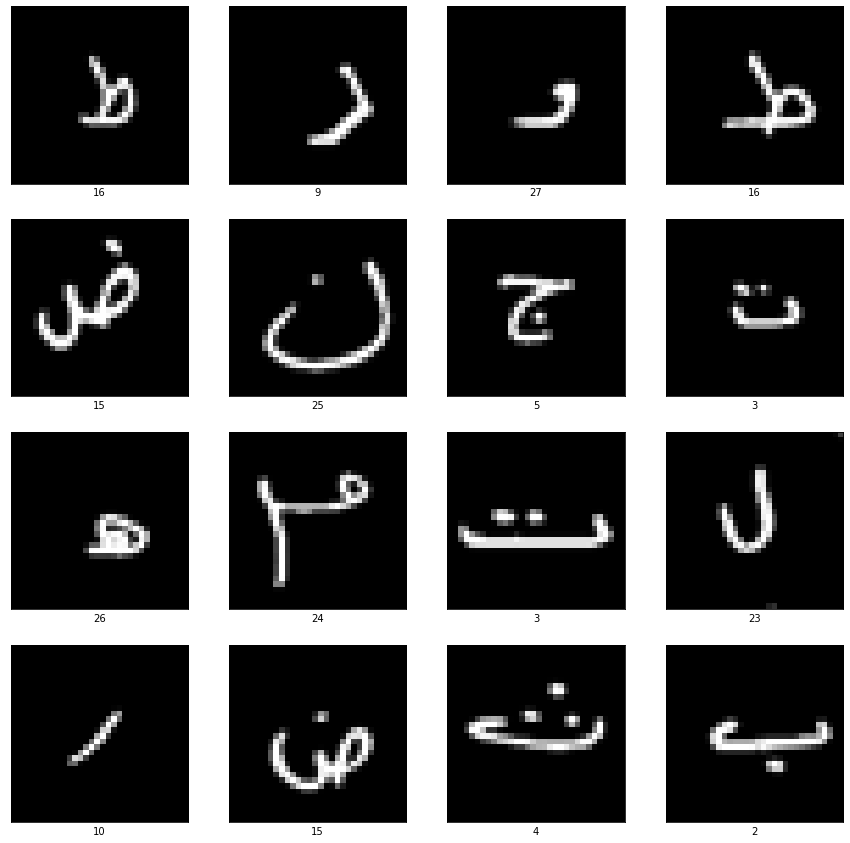

In [70]:
plt.figure(figsize=(15, 15))
random_num = np.random.randint(0, 13439, size=16)
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[random_num[i]].reshape(32, 32).T, "gray")
    plt.xlabel(int(Y_train[random_num[i]][0]) + 1)

In [71]:
# normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0
n_classes = len(np.unique(Y_train))
n_classes

28

In [72]:
Y_train = keras.utils.to_categorical(Y_train, n_classes)
Y_test = keras.utils.to_categorical(Y_test, n_classes)

In [73]:
X_train = X_train.reshape([-1, 32, 32, 1])
X_test = X_test.reshape([-1, 32, 32, 1])

In [74]:
# create and configure augmented image generator
datagen_train = ImageDataGenerator(
    width_shift_range=0.1,  # randomly shift images horizontally (10% of total width)
    height_shift_range=0.1,  # randomly shift images vertically (10% of total height)
    horizontal_flip=True) # randomly flip images horizontally

# fit augmented image generator on data
datagen_train.fit(X_train)

<h1>CONVOLUTIONAL NEURAL NETWORK</h1>

In [75]:

model = keras.Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu', input_shape=(32, 32, 1)))
model.add(layers.Conv2D(filters=32, kernel_size=5, padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(256, input_dim=1024, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(n_classes, activation='softmax'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        832       
                                                                 
 conv2d_9 (Conv2D)           (None, 32, 32, 32)        25632     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      

In [76]:

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [77]:
history=model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size = 128),
                               epochs=50, steps_per_epoch = X_train.shape[0]//128,
                               validation_data=(X_test, Y_test),
                               verbose=1)

Epoch 1/50


/tmp/ipykernel_4271/472995699.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(datagen_train.flow(X_train, Y_train, batch_size = 128),


104/104 [==============================] - 74s 697ms/step - loss: 2.8328 - accuracy: 0.1466 - val_loss: 1.6847 - val_accuracy: 0.4204
Epoch 2/50
104/104 [==============================] - 70s 671ms/step - loss: 1.7308 - accuracy: 0.4078 - val_loss: 1.1750 - val_accuracy: 0.5755
Epoch 3/50
104/104 [==============================] - 72s 689ms/step - loss: 1.2634 - accuracy: 0.5553 - val_loss: 0.7385 - val_accuracy: 0.7440
Epoch 4/50
104/104 [==============================] - 70s 670ms/step - loss: 1.0191 - accuracy: 0.6395 - val_loss: 0.5667 - val_accuracy: 0.8044
Epoch 5/50
104/104 [==============================] - 70s 673ms/step - loss: 0.8447 - accuracy: 0.7064 - val_loss: 0.4231 - val_accuracy: 0.8598
Epoch 6/50
104/104 [==============================] - 67s 641ms/step - loss: 0.7284 - accuracy: 0.7504 - val_loss: 0.4230 - val_accuracy: 0.8619
Epoch 7/50
104/104 [==============================] - 74s 711ms/step - loss: 0.6388 - accuracy: 0.7833 - val_loss: 0.3388 - val_accuracy: 0.8

In [79]:
model.save("AHDC.h5")

<h1>Accuracy</h1>

In [81]:
model=tf.keras.models.load_model("AHDC.h5")
model.evaluate(X_test, Y_test)

105/105 [==============================] - 3s 30ms/step - loss: 0.1257 - accuracy: 0.9670


[0.12572503089904785, 0.9669544696807861]

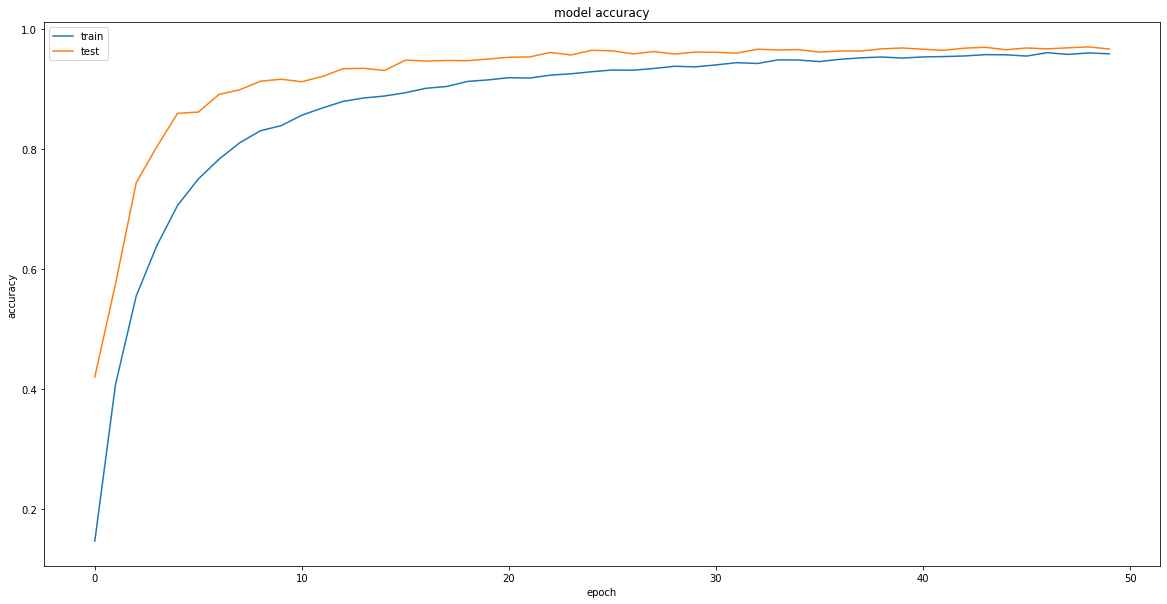

In [88]:
plt.figure(figsize=(20,10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

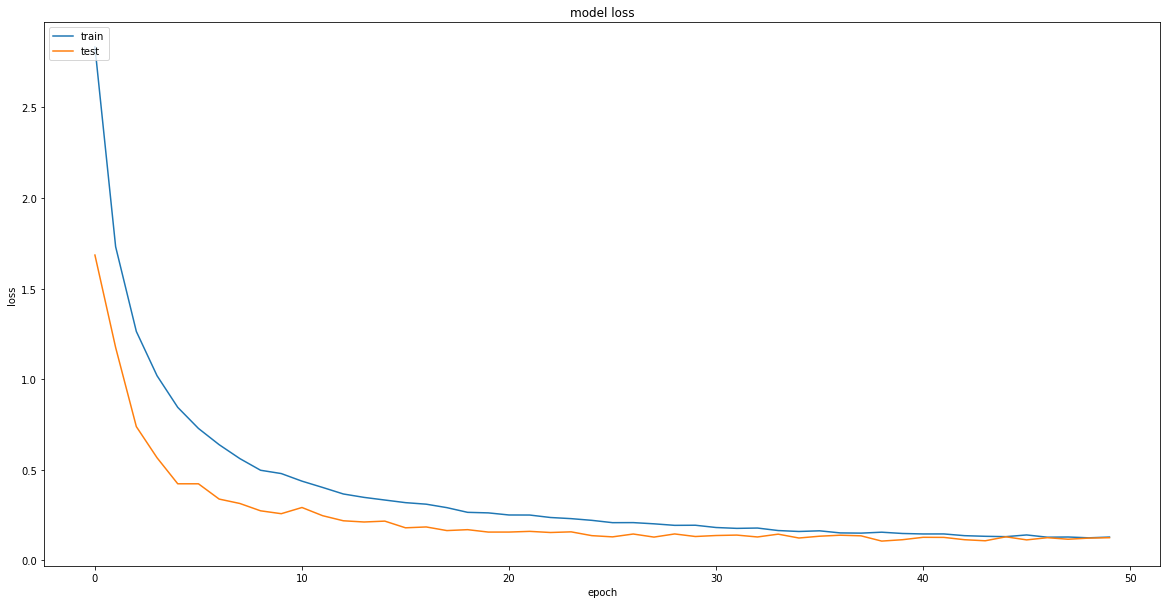

In [89]:
plt.figure(figsize=(20,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h1>Some Predictions</h1>

In [90]:
Y_predicted = model.predict(X_test)
Y_predicted[0]

array([1.0000000e+00, 2.8871466e-22, 0.0000000e+00, 8.8107740e-31,
       1.5271246e-28, 1.2126805e-22, 5.7913458e-19, 4.2952046e-25,
       2.7386618e-22, 4.4729398e-17, 5.3775445e-15, 5.4259118e-28,
       8.0780953e-32, 2.4610366e-35, 7.8236645e-35, 1.4440622e-19,
       4.7538260e-20, 1.4661717e-14, 3.9497050e-17, 1.0547403e-31,
       1.5138276e-32, 6.1176784e-25, 2.8187996e-17, 1.0437574e-16,
       8.4870104e-33, 2.7737475e-29, 5.5635261e-23, 1.2515045e-22],
      dtype=float32)

In [91]:
np.argmax(Y_predicted[0])

0

In [92]:
np.argmax(Y_predicted[89])

17

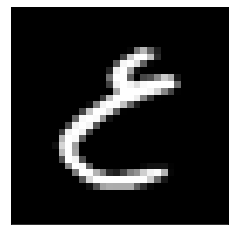

In [93]:

plt.xticks([])
plt.yticks([])

plt.imshow(X_test[89].reshape(32, 32).T, "gray")

In [94]:
characters_dict.get(17 + 1)

'ع'

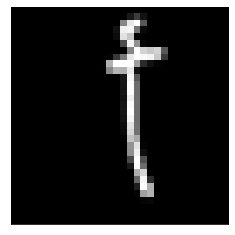

In [95]:
plt.xticks([])
plt.yticks([])

plt.imshow(X_test[0].reshape(32, 32).T, "gray")

In [96]:
characters_dict.get(0 + 1)

'ا'

In [97]:
y_predicted_labels = [np.argmax(i) for i in Y_predicted]
y_predicted_labels[:5]

[0, 1, 1, 2, 2]

In [111]:
y_predicted_labels1 = [characters_dict.get(i) for i in characters_dict]
y_predicted_labels1[:5]

['ا', 'ب', 'ت', 'ث', 'ج']

 <h1>Confusion Matrix</h1>

In [99]:
y_pred = model.predict(X_test)
y_obs = np.argmax(y_pred, axis=1)
y_true = np.argmax(Y_test, axis=1)

Test Accuracy:  0.9669544507293838


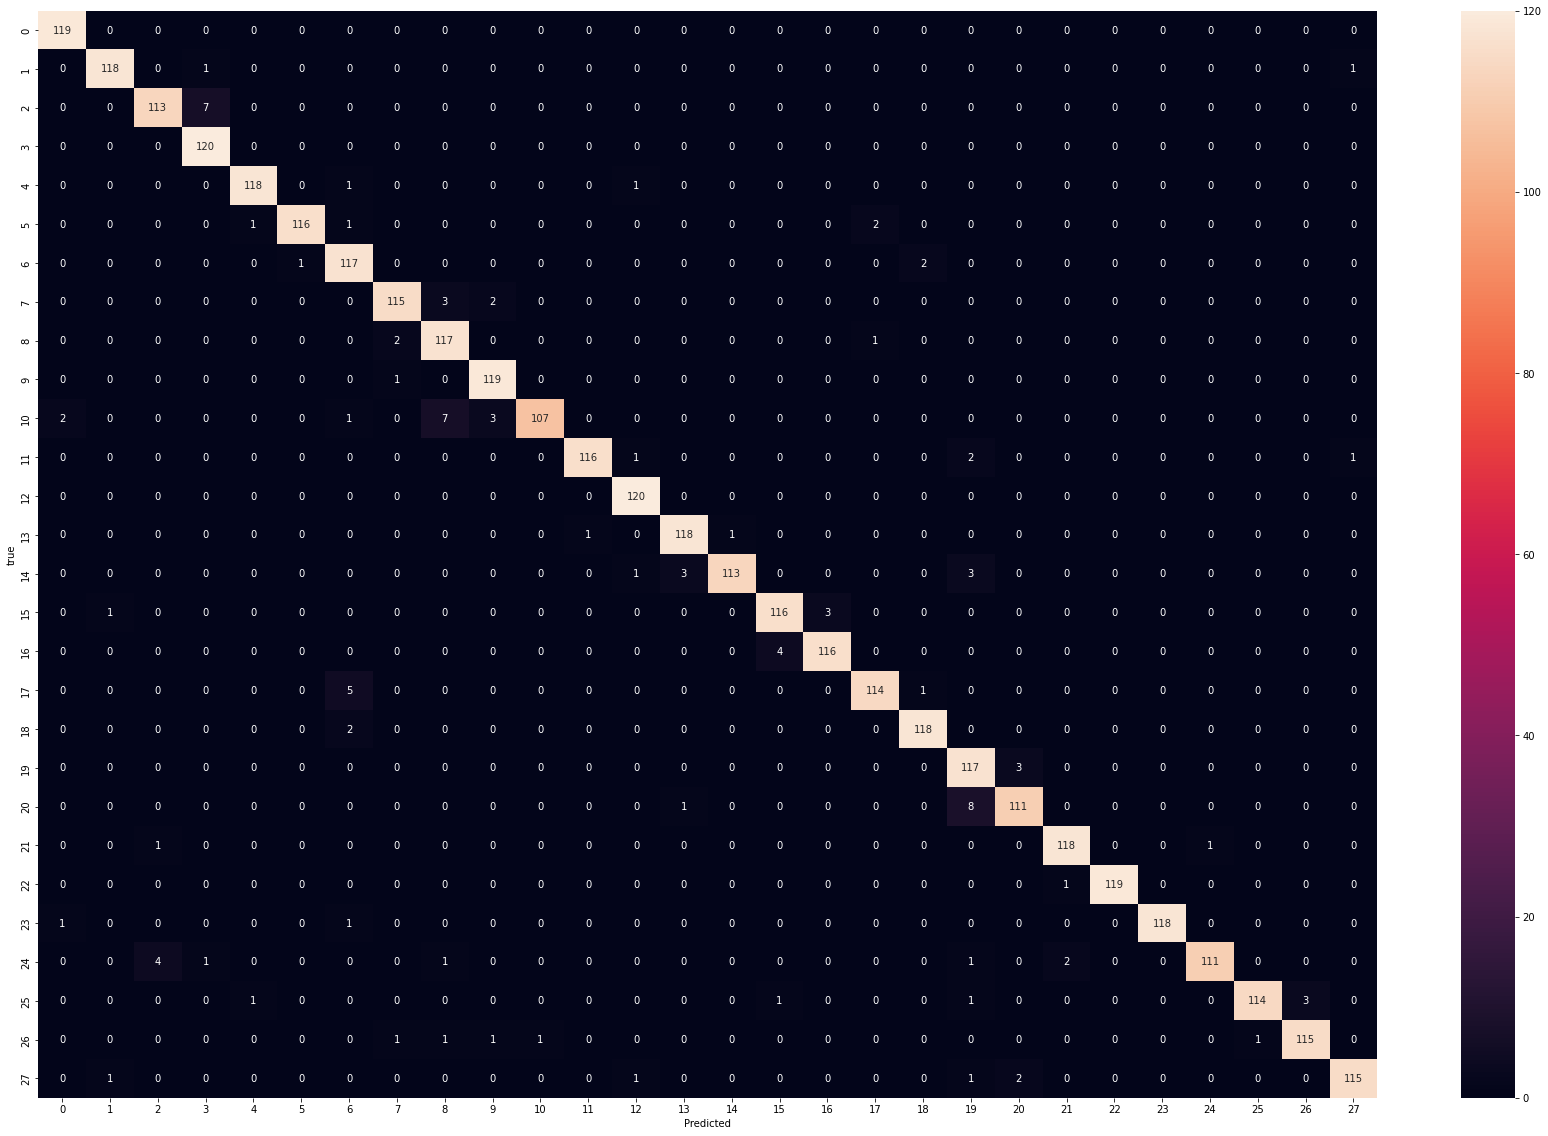

In [100]:
test_acc = accuracy_score(y_true, y_obs)
cm = confusion_matrix(y_true, y_obs)

print("Test Accuracy: ", test_acc)
fig, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("true")
plt.show()


<h1>CLASSIFICATION REPORT</h1>

In [101]:
print(classification_report(y_true, y_obs))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       0.98      0.98      0.98       120
           2       0.96      0.94      0.95       120
           3       0.93      1.00      0.96       120
           4       0.98      0.98      0.98       120
           5       0.99      0.97      0.98       120
           6       0.91      0.97      0.94       120
           7       0.97      0.96      0.96       120
           8       0.91      0.97      0.94       120
           9       0.95      0.99      0.97       120
          10       0.99      0.89      0.94       120
          11       0.99      0.97      0.98       120
          12       0.97      1.00      0.98       120
          13       0.97      0.98      0.98       120
          14       0.99      0.94      0.97       120
          15       0.96      0.97      0.96       120
          16       0.97      0.97      0.97       120
          17       0.97    

In [28]:
% tensorboard --logdir logs / AHDC

Launching TensorBoard...

<h1>CLASSIFYING IMAGES FROM DEPLOYED MODEL</h1>

[INFO] loading and processing images...
[INFO] loading network...
[INFO] classifying image...
ث


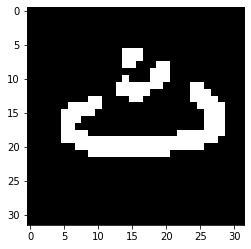

In [130]:
characters = ["ا", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", "ض", "ط", "ظ", "ع", "غ", "ف", "ق",
              "ك", "ل", "م", "ن", "ه", "و", "ي"]
characters_dict = dict(zip(np.arange(1, len(characters) + 1), characters))

IMG_SIZE=32

print("[INFO] loading and processing images...")
test_image = cv2.resize(cv2.imread("/home/muzammil/Python_programs/Arabic Handwritten digits/archive/test images 3360x32x32/test/id_175_label_4.png", cv2.IMREAD_GRAYSCALE),  (IMG_SIZE,IMG_SIZE))
plt.imshow(test_image,"gray")
test_image = np.array(test_image).reshape( -1, IMG_SIZE, IMG_SIZE, 1).T
test_image=test_image/255



print("[INFO] loading network...")
model = tf.keras.models.load_model("AHDC.h5")



print("[INFO] classifying image...")
prediction = model.predict( test_image )
label = characters_dict.get((np.argmax(prediction)+1))
print(label)